In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px

In [3]:
total=pd.read_csv('oliveyoung_review(20230502).csv')

## total 전처리

In [48]:
total.isnull().sum()

brand                     0
product_name              0
product_option            0
review_point              0
review_date               0
review_text           72380
review_referral           0
user_name                 0
user_rank                 0
user_type                 0
user_help_num             0
user_follower_num         0
user_following_num        0
dtype: int64

In [50]:
total=total[~total['review_text'].isnull()]

## 체험단 vs 비체험단

In [51]:
ad=total[total['review_date'].str.contains('체험단')]

In [52]:
non_ad=total[~total['review_date'].str.contains('체험단')]

### 데이터 크기

In [53]:
print("전체 데이터 크기:", total.shape[0])
print("체험단 데이터 크기:", ad.shape[0])
print("체험단 비율(%):", round(ad.shape[0]/total.shape[0]*100, 2))

전체 데이터 크기: 1709273
체험단 데이터 크기: 41209
체험단 비율(%): 2.41


### 상품 수, 상품별 평균 리뷰수
- 전체 상품의 경우, 상품별 편차가 큰편

In [54]:
print("전체 상품 수:",total.product_name.nunique())
print("체험단 상품 수:", ad.product_name.nunique())

전체 상품 수: 22157
체험단 상품 수: 2113


In [55]:
ad.groupby('product_name').count()[['review_text']].mean()

review_text    19.502603
dtype: float64

In [64]:
ad.groupby('product_name').count()[['review_text']].std()

review_text    13.23792
dtype: float64

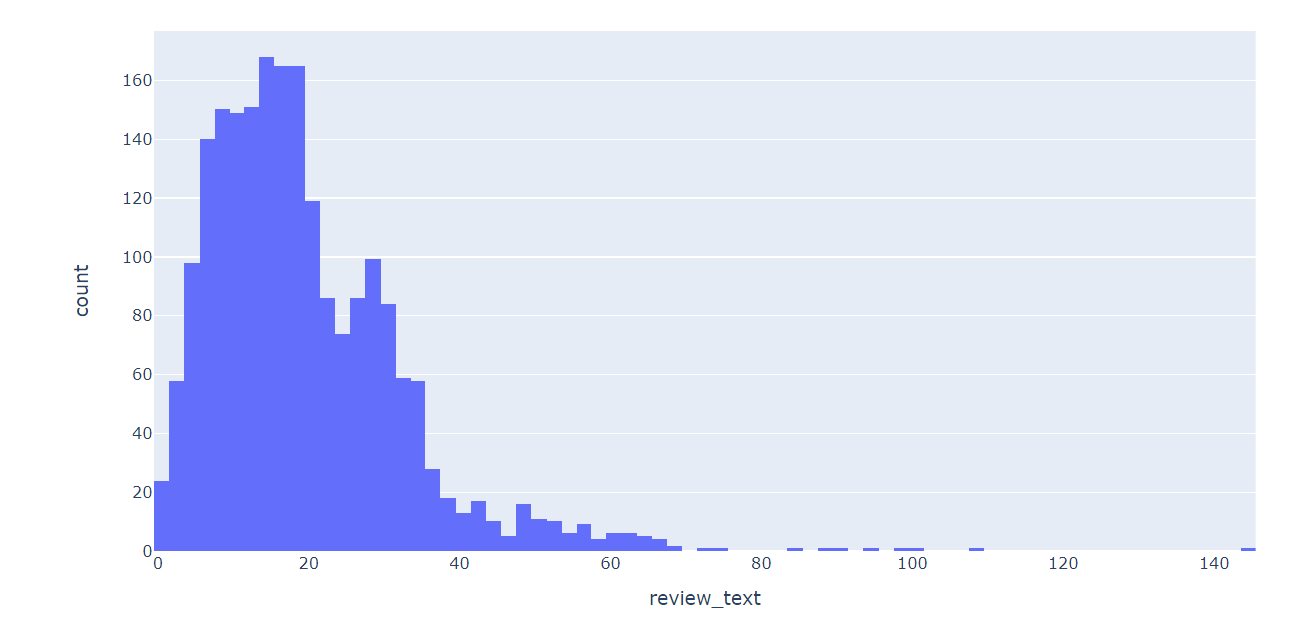

In [56]:
df = ad.groupby('product_name').count()[['review_text']]
fig = px.histogram(df, x="review_text")
fig.show()

In [57]:
total.groupby('product_name').count()[['review_text']].mean()

review_text    77.143702
dtype: float64

In [65]:
total.groupby('product_name').count()[['review_text']].std()

review_text    252.853128
dtype: float64

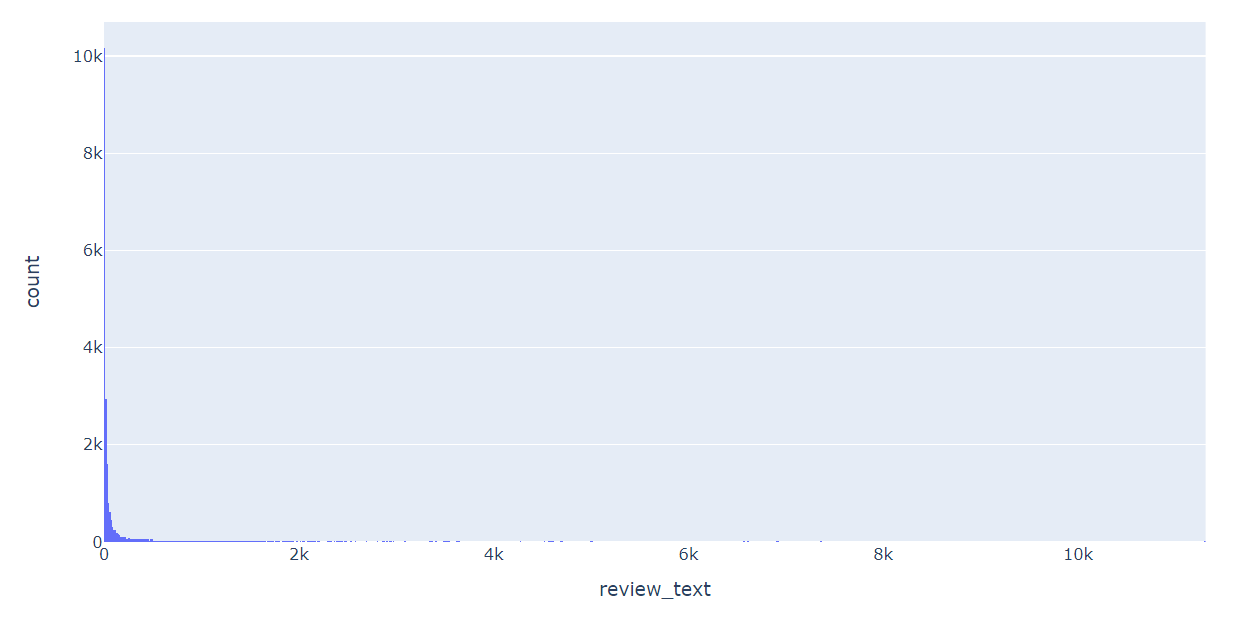

In [58]:
df = total.groupby('product_name').count()[['review_text']]
fig = px.histogram(df, x="review_text")
fig.show()